# **Importações**

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


sklearn.set_config('diagram')

# **Base de dados**
Para esse projeto utilizaremos o **Individual Household Electric Power Consumption** do *UC Irvine Machine Learning Repository*


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

In [ ]:
df = fetch_ucirepo(id=235)
display(df.data.features)

/usr/local/lib/python3.12/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


# **Metodologia e algoritmos**
Em termos de implementação, usaremos dois tipos de algoritmos de aprendizado supervisionado (todos de regressão):
- KNN;
- Redes Neurais (MLP Regressor).

# **Normalização dos dados**

In [ ]:
df_data = df.data.features.copy()

numerical_cols_to_convert = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]

for col in numerical_cols_to_convert:
    df_data[col] = pd.to_numeric(df_data[col], errors='coerce')

df_cleaned = df_data.dropna()

X = df_cleaned.drop(columns=['Global_active_power', 'Date', 'Time'])
y = df_cleaned['Global_active_power']

display(X.head())

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.418,234.84,18.4,0.0,1.0,17.0
1,0.436,233.63,23.0,0.0,1.0,16.0
2,0.498,233.29,23.0,0.0,2.0,17.0
3,0.502,233.74,23.0,0.0,1.0,17.0
4,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X)

X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns, index=X.index)

In [ ]:
print("Primeiras 5 linhas dos dados normalizados:")
display(X_normalized_df.head())

Primeiras 5 linhas dos dados normalizados:


,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.300719,0.376090,0.377593,0.0,0.0125,0.548387
1,0.313669,0.336995,0.473029,0.0,0.0125,0.516129
2,0.358273,0.326010,0.473029,0.0,0.0250,0.548387
3,0.361151,0.340549,0.473029,0.0,0.0125,0.548387
4,0.379856,0.403231,0.323651,0.0,0.0125,0.548387


In [ ]:
print("Estatísticas descritivas dos dados normalizados:")
display(X_normalized_df.describe())

Estatísticas descritivas dos dados normalizados:


,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,8.900322e-02,5.699469e-01,9.186223e-02,1.274913e-02,1.623150e-02,2.083370e-01
std,8.109495e-02,1.046845e-01,9.220739e-02,6.992081e-02,7.277533e-02,2.721663e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.453237e-02,5.101777e-01,2.489627e-02,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.194245e-02,5.754443e-01,4.979253e-02,0.000000e+00,0.000000e+00,3.225806e-02
75%,1.395683e-01,6.361874e-01,1.286307e-01,0.000000e+00,1.250000e-02,5.483871e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# **Implementação**

KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (1229568, 6)
X_test: (819712, 6)
y_train: (1229568,)
y_test: (819712,)


In [ ]:
knn = KNeighborsRegressor(n_neighbors=7, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

print(f'RMSE KNN={rmse}.')

RMSE KNN=0.039341211813020534.


In [ ]:
y_pred_knn = knn.predict(X_test)

print("5 amostras de predição do KNN para o consumo elétrico em KW:")
print(y_pred_knn[:5])

5 amostras de predição do KNN para o consumo elétrico em KW:
[4.908      0.09542857 2.56485714 6.594      3.75771429]


Redes Neurais

In [ ]:
# Divisão inicial: treino + validação vs teste
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)

# Divisão do conjunto de treino: treino e validação
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 40, 30],
                       activation='relu',
                       max_iter=200,
                       solver='adam',
                       learning_rate_init=0.001,
                       batch_size=256,
                       random_state=42)

In [ ]:
# Pipeline: normalização z-score + modelo MLP
pipeline = make_pipeline(StandardScaler(), mlp_reg)

In [ ]:
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(batch_size=256, hidden_layer_sizes=[50, 40, 30],
                              random_state=42))])

In [ ]:
# Treinamento
pipeline.fit(X_train, y_train)

# Previsão no conjunto de validação
y_pred = pipeline.predict(X_valid)

# Avaliação da performance: raiz do erro quadrático (RMSE)
rmse = root_mean_squared_error(y_valid, y_pred)

print(f'RMSE Rede Neural={rmse}.')

RMSE Rede Neural=0.03176461277023689.


In [ ]:
y_pred_nn_valid = pipeline.predict(X_valid)

print("5 amostras de predição da NN para o consumo elétrico em KW")
print(y_pred_nn_valid[:5])

5 amostras de predição da NN para o consumo elétrico em KW
[1.40816032 1.43119387 0.28258137 0.35343107 0.24924125]


#**Comparação entre valores reais e  predições**


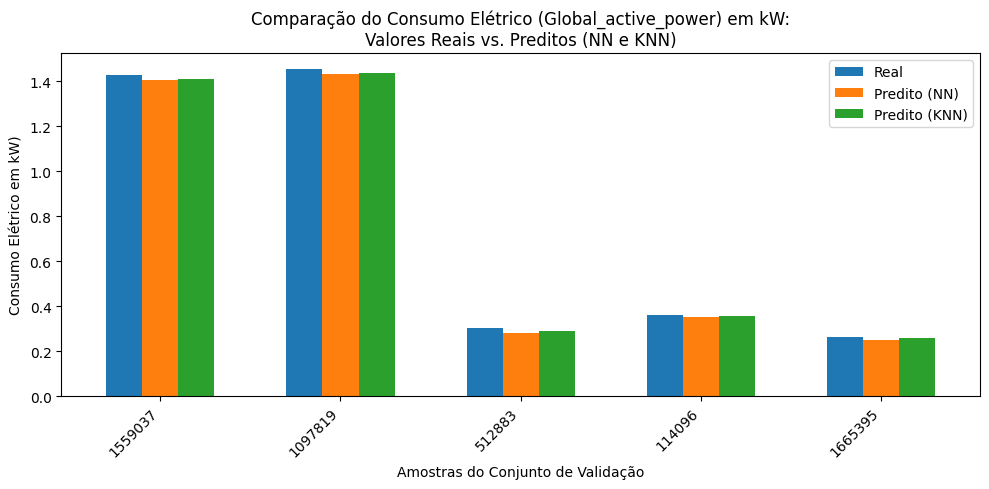

In [ ]:
actual_values = y_valid.head(5)

predicted_values_nn = y_pred_nn_valid[:5]

predicted_values_knn = knn.predict(X_valid.head(5))

comparison_df = pd.DataFrame({
    'Actual': actual_values.values,
    'NN Predicted': predicted_values_nn,
    'KNN Predicted': predicted_values_knn
}, index=actual_values.index)

fig, ax = plt.subplots(figsize=(10, 5))
comparison_df.plot(kind='bar', ax=ax, width=0.6)
ax.set_title('Comparação do Consumo Elétrico (Global_active_power) em kW:\nValores Reais vs. Preditos (NN e KNN)')
ax.set_xlabel('Amostras do Conjunto de Validação')
ax.set_ylabel('Consumo Elétrico em kW)')
ax.set_xticklabels(actual_values.index, rotation=45, ha='right')
ax.legend(['Real', 'Predito (NN)', 'Predito (KNN)'])
plt.tight_layout()
plt.show()

# **Predição de consumo futuro baseado nos últimos consumos**


In [ ]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d/%m/%Y')


/tmp/ipython-input-3165099347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d/%m/%Y')


In [ ]:
df_cleaned_sorted = df_cleaned.sort_values(by=['Date', 'Time']).copy()

max_date = df_cleaned_sorted['Date'].max()
three_months_ago = max_date - pd.DateOffset(months=3)

df_last_three_months = df_cleaned_sorted[df_cleaned_sorted['Date'] >= three_months_ago]

features_for_avg = df_last_three_months.drop(columns=['Global_active_power', 'Date', 'Time'])

average_features = features_for_avg.mean()

input_for_nn = pd.DataFrame(average_features).T

print("Média das features dos últimos 3 meses")
display(input_for_nn)

Média das features dos últimos 3 meses


,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.126871,241.414228,4.657738,1.091677,1.147092,6.881086


In [ ]:
predicao_mes_seguinte = pipeline.predict(input_for_nn)

print(f"Predição do consumo elétrico instantâneo (Global_active_power) com a NN: {predicao_mes_seguinte[0]:.2f} kW")

Predição do consumo elétrico (Global_active_power) com a NN: 1.02 kW
